In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import math
import numpy as np 
import pandas as pd
import matplotlib as mpl
from sklearn import preprocessing
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

In [3]:
data = pd.read_csv("output.csv")

In [4]:
def try_int(x):
    try:
        return int(x)
    except ValueError:
        return

data["Weather"] = pd.Categorical(data["Weather"]).codes
data["Day"] = pd.Categorical(data["Day"]).codes
data["Station Name"] = pd.Categorical(data["Station Name"]).codes
data["Time"] = data["Time"].map(lambda x: try_int(x.split(":")[0]))
data["Population"] = data["Population"].map(lambda x: try_int(x))

In [5]:
X = data[["Station Name", "Day", "Time", "Weather"]].values
y = data[["Population"]].values

In [6]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

False

In [7]:
norm_x = preprocessing.scale(X)
norm_y = preprocessing.scale(y)

In [10]:
X_train , X_test, y_train, y_test = train_test_split(norm_x, norm_y, test_size=0.3, random_state=69)

In [11]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()
classifier.fit(X_train.reshape(-1,4) , y_train.ravel())

DecisionTreeRegressor()

In [12]:
y_pred = classifier.predict(X_test.reshape(-1,4))

In [13]:
print("Accuracy:",r2_score(y_test, y_pred.reshape(-1,1)))

Accuracy: 0.9834404934177797


In [14]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [15]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



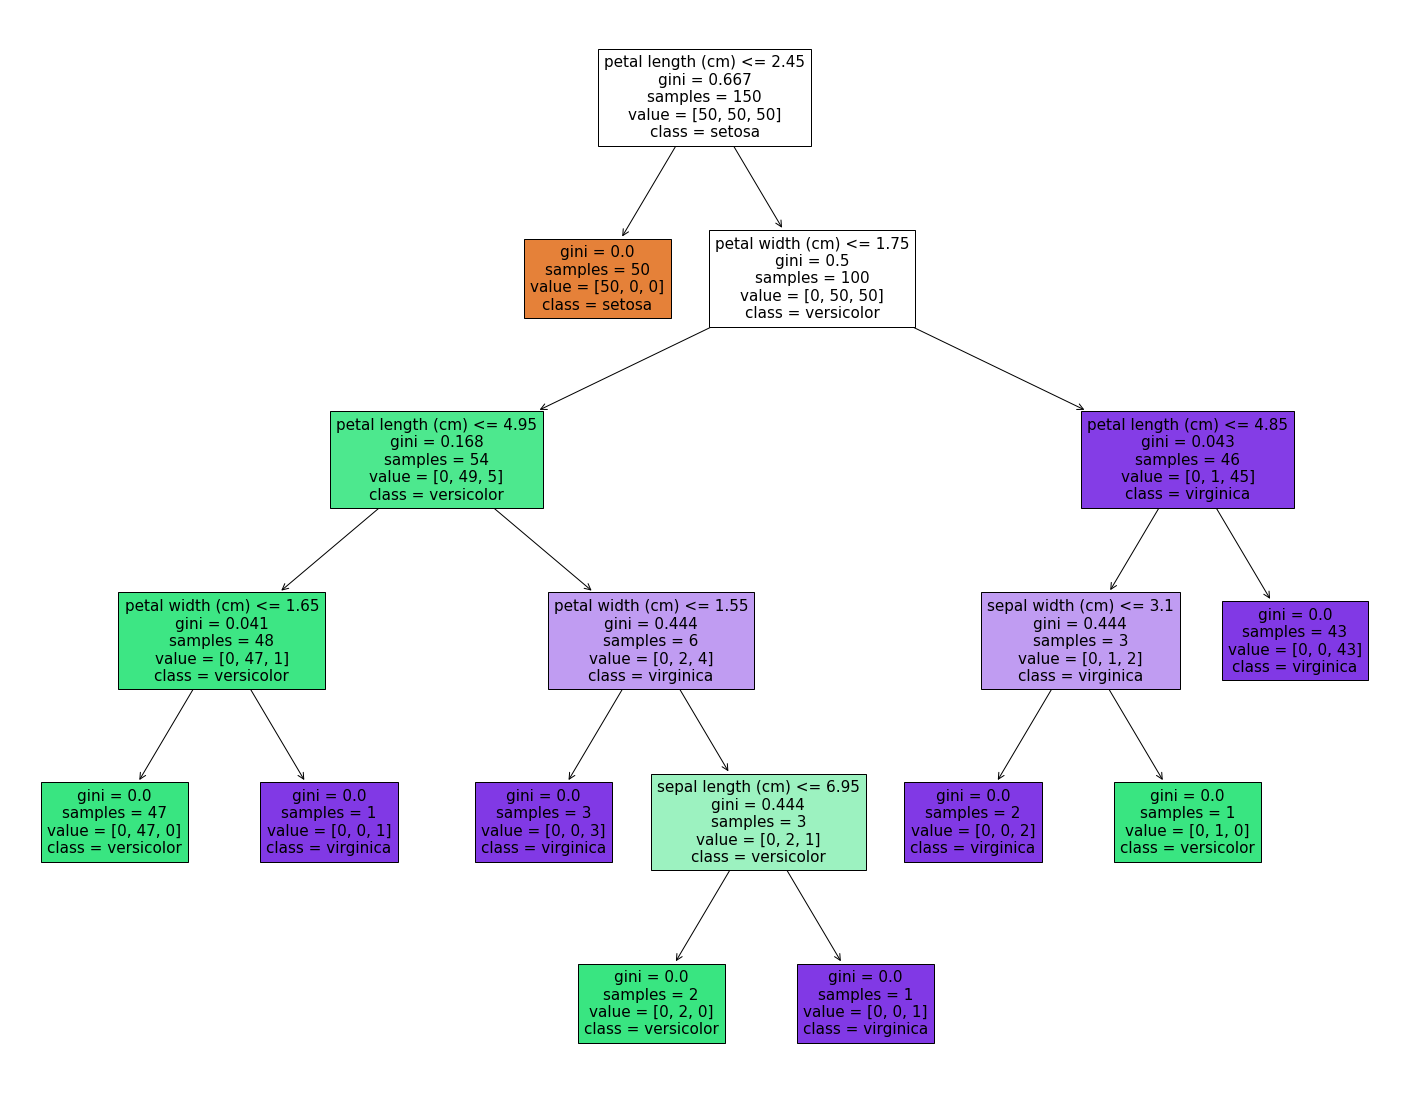

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
model = RandomForestClassifier(max_depth = 3, n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1807609334)

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
